In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image

In [ ]:
data = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv', low_memory=False)

questions = data.iloc[0, :].T
data = data.iloc[1:, :].dropna(how="all")

# removing outliers and keeping only classes of interest
data = data[(data['Time from Start to Finish (seconds)'].astype(float)  >= 123.75) & (data['Time from Start to Finish (seconds)'].astype(float) <= 13895.0)]
data = data[(data['Q5'] == 'Data Scientist') | (data['Q5'] == 'Data Engineer') | (data['Q5'] == 'Machine Learning Engineer')]

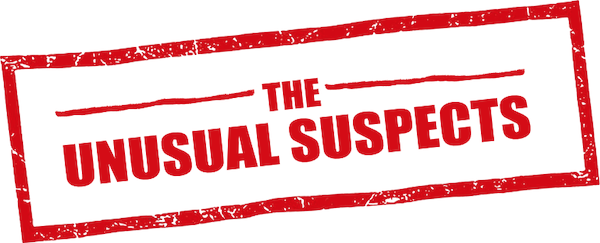

<div style="background:white; border-radius: 5px">
<h1 style="color: red; font-family:Impact; text-align:center;">The data scientist, the data engineer, and the machine learning engineer</h1>
<p></p>
</div>

<p style="font-family:Times New Roman; font-size:18px;">
Survey data is a small but rich data set in this big data world, often filled with insight that comes directly from participants, insights that are much harder to infer from larger, busier, fast moving big data sets. It is a historical approach that comes from a time of data scarcity, when enterprise and organizations relied on anecdotes and instincts, with only the occasional data-driven insight to guide them.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
Survey data is a sample, meant to represent some overall population and we use its results to extrapolate a general model of that population that can be useful to guide a variety of decisions.  We slice and dice the data to extract down to smaller and smaller segments within our sample, as we look for differences, test our hypotheses and find our aha moment.  From the differences we extract, better decisions are made about policy, business strategy, etc.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
And as we slice and dice, our data set becomes smaller, to the point where we are unsure if the differences between groups we find are indeed statistically relevant. The two-proportions z-test for statistical significance becomes a fundamental tool to separate meaningful differences from the mere hazard of our small segment samples. A good summary of the approach can be found <a href="https://stattrek.com/hypothesis-test/difference-in-proportions.aspx" target="_blank">here</a>.
</p>

<h1 style="font-family:Times New Roman; text-align:center;">And Now For Today's Story</h1>

<p style="font-family:Times New Roman; font-size:18px;">
Within the data science community there is a lot of literature describing the differences between data scientists, data engineers, and machine learning engineers.
</p>

<p style="font-family:Times New Roman; font-size:18px; text-align:center; ">
<a href="https://sennalabs.com/en/blogs/data-engineer-vs-machine-learning-engineer-vs-data-science" target="_blank">https://sennalabs.com/en/blogs/data-engineer-vs-machine-learning-engineer-vs-data-science</a>
</p>

In [ ]:
#thanks to @subinium
fig, ax = plt.subplots(1,1, figsize=(15, 6))
data_q5 = data['Q5'].value_counts()
ax.bar(data_q5.index, data_q5, width=0.55, 
       edgecolor='gray', color='lightblue',
       linewidth=0.7)

for i in data_q5.index:
    ax.annotate(f"{data_q5[i]}", 
                   xy=(i, data_q5[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 4200)    
ax.set_xticklabels(data_q5.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 4001, 500),fontfamily='serif')
fig.text(0.1, 0.95, 'Current Role', fontsize=16, fontweight='bold', fontfamily='serif') 
plt.show()

<p style="font-family:Times New Roman; font-size:18px;">
But do you really know them that well? With a focus in this survey on skill and tool usage, let’s see if the differences we find in the survey data align with the expected differences the “interweb” tells us.
To make it more interesting, let's pretend we’ve been given a somewhat random set of clues, consisting in the least sexy and yet most efficient of the visualizations, the table! First let’s agree on something, if an analyst is stranded on a desert island and can only bring one visualization with them, the table is probably it. Now let’s consider an example before starting our investigation. We will present the data in a table, with columns labelled A, B, and C.  Here’s our example:
</p>

<p style="font-family:Times New Roman; font-size:16px;">
    <i>Do you like cheese?</i>
</p>
<table style="font-family:Times New Roman; font-size:16px;">
  <tr style="background-color:white; border-top: 1px solid black; border-bottom: 1px solid black;">
    <th>Answer</th>
    <th>a</th>
    <th>b</th>
    <th>c</th>
  </tr>
  <tr>
    <td style="text-align:left">Yes</td>
    <td style="width:100px">44.8%</td>
    <td style="width:100px">41.9%</td>
    <td style="width:100px">66.2%</td>
  </tr>
</table>

<p style="font-family:Times New Roman; font-size:18px;">
Obviously the survey did not include questions about food preferences, this is just a guide to prepare you for the format.  What we need to add is the two-proportions z-test results, which will tell us when a difference in proportion is actually statistically significant.
</p>

<p style="font-family:Times New Roman; font-size:16px;">
    <i>Do you like cheese?</i>
</p>
<table style="font-family:Times New Roman; font-size:16px;">
  <tr style="background-color:white; border-top: 1px solid black; border-bottom: 1px solid black;">
    <th>Answer</th>
    <th>a</th>
    <th>b</th>
    <th>c</th>
  </tr>
  <tr>
    <td style="text-align:left">Yes</td>
    <td style="width:100px">44.8%</td>
    <td style="width:100px">41.9%</td>
    <td style="width:100px">66.2% a,b</td>
  </tr>
</table>

<p style="font-family:Times New Roman; font-size:18px;">
So how do we interpret this?  Group A and B like cheese equally, statistically there is no difference.  Group C however is statistically different from both A and B, and loves cheese more than both.  That is noted by a and b subscript notations after the proportion.  Since it is a two way test, it means that both a and b are statistically different from C, but I’ve put the notation on the largest proportion for that class to keep the table as clean as possible.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
So to interpret the above table in terms of our detective work, if there was a theory floating around out there that Data Engineers loved cheese more than other members of the Data Science community, we would start to edge towards the conclusion that Group C might be Data Engineers.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
Now let’s look at the real data and see if you can guess which is which?
</p>


In [ ]:
Image("../input/assets/table1_v4.png")

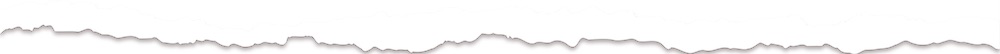

<p style="font-family:Times New Roman; font-size:18px;">
We’ll start with gender.  We note right away that each segment is skewed very male, a standard issue in the STEM professions that society is making some headway to rectify.  The survey data lines up with generally available data on female representation. <a href="https://towardsdatascience.com/are-women-crushing-the-gender-gap-in-data-science-and-related-fields-3ab7ae299b4b" target="_blank">https://towardsdatascience.com/are-women-crushing-the-gender-gap-in-data-science-and-related-fields-3ab7ae299b4b</a>
</p>

<p style="font-family:Times New Roman; font-size:18px;">
Looking at the differences between the groups, we note that the gender distribution is fairly similar across all three groups. There is a statistically significant difference in that Group C has more males than Group B, but while this gap is statistically significant the gap itself is rather small and does not drive a significant implication.  If we filled three rooms with 1000 members of each group, it is unlikely anyone would observe any gender difference between them.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
So let’s move on to see if we can find data more differentiating and solve our riddle.
</p>


In [ ]:
Image("../input/assets/table2_v4.png")

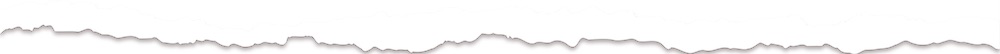

<p style="font-family:Times New Roman; font-size:18px;">
Well, besides the sample being one very educated group with the largest proportion being masters degrees for all groups, and there are some differences between groups, there are no differences with meaningful implication.  We can see slightly more bachelor degrees in Group C compared with B, and more Doctorates in Group B compared with A, but we are looking for a distinction where one group differentiates from both other groups so we have a unique identifier that may help us paint the picture of who the group is.
</p>


In [ ]:
Image("../input/assets/table3_v4.png")

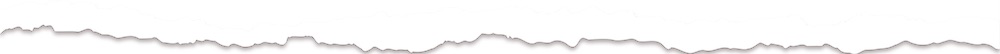

<p style="font-family:Times New Roman; font-size:18px;">
Well now we have some interesting results.  Many more practitioners in Group B use RStudio when compared to both other groups, almost two fold Group A and three times Group C.  And Group A has a greater proportion who use Notepad++.  We also note that Group B is also more likely to use Jupyter, but the actual difference is not as interesting, all groups use Jupyter, it is the most used integrated environment for all.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
While it would be tempting to look at other differences within the table, none of those differences are statistically significant, in that we can’t reject the hypothesis that the difference between them is 0.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
Formulating your own hypotheses as to who is who already?  Let’s continue.
</p>


In [ ]:
Image("../input/assets/table4_v4.png")

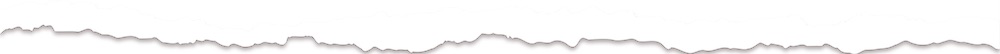

<p style="font-family:Times New Roman; font-size:18px;">
This question is multi-select and we can quickly see most practitioners use a few programming languages regularly.  The average number of languages used regularly for Group A is 2.9, 2.6 for Group B, Group C averages 2.5 languages, so the most diverse is Group A.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
Within the languages used we do see a host of significant differences.  Let’s start with the biggest significant differences. Over two thirds of Group A use SQL regularly, while only half of Group B do and a little more than a third of practitioners in Group C.  Group A also has more Java users than either group.  Group C on the other hand has many more practitioners who use C++ compared with their peers in Group A and B, slightly over 1 in 4 that do so.  Likely you are starting to formulate some guesses at this point, we’ve learned a lot.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
Lots of clues are now accumulating, and like any good detective we need to start putting this together.  You’ve seen this in tons of movies, the detective wall where we begin to narrow in on the right suspect.
</p>



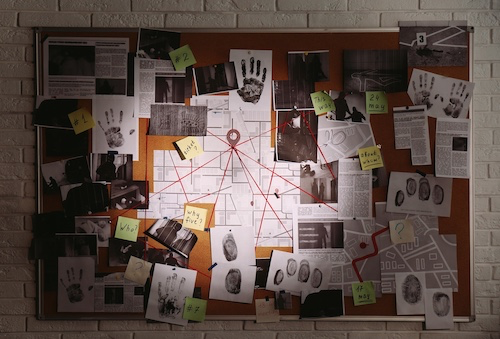

<p style="font-family:Times New Roman; font-size:18px;">
But since we are data scientists, we’ll use a comparable visual to try and map out our clues and figure out the identity of each group.
</p>

In [ ]:
Image("../input/assets/Kaggle Tree - Midpoint.png", width = 3000, height = 1500)

<p style="font-family:Times New Roman; font-size:18px;">
So we can see here that while there are some statistically significant differences in proportion of users between Jupyter and Python usage, they are less differentiating than the differences on the other side of our chart.  You are more likely to find practitioners using these tools than other groups if you randomly selected some practitioners for interrogation.  Do you have enough clues already?
</p>

<p style="font-family:Times New Roman; font-size:18px;">
Let’s go on and see how our next table of clues lines up and if we can paint some clues that solve our mystery.
</p>


In [ ]:
Image("../input/assets/table5_v4.png")

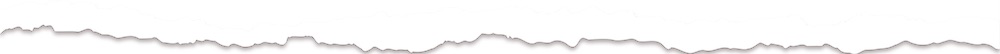

<p style="font-family:Times New Roman; font-size:18px;">
In terms of cloud computing Amazon Elastic Compute Cloud leads the way for all groups with no significant distinction for any group from the others.  Lambda within Amazon Web Services is common as well but Group A has significantly more practitioners than Group B or Group C.  The only other clue is that more practitioners in Group B use something else, but it is only 3.4% of those practitioners overall. Now let's take a look at the algorithms our practitioners use.
</p>

In [ ]:
Image("../input/assets/table6_v4.png")

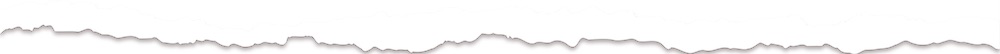

<p style="font-family:Times New Roman; font-size:18px;">
Oh boy, have we found our smoking gun?! With this new clue table things start to get very dynamic.  Looking at algorithm activity, Group C displays some notable differences.  First, we must acknowledge that there are practitioners for every algorithm in each column, generating the question as to whether there are more similarities than differences between the groups.  However given our pursuit is to identify the role of each group, we will focus on differences.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
In terms of algorithms we note Group A averages 2.6 algorithms per practitioner, Group B 3.2 and Group C using the most variety averaging 3.5 algorithms per user.  This is the reverse of the diversity trend we saw with programming languages, with Group A using the most and Group C using the fewest.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
We also note that Group C has significantly more practitioners using neural networks and deep learning models, which is what is increasing the number of algorithms this group uses.  And while regression, decision tree, and gradient boost are commonly practiced in all groups we see statistically significant higher proportions for these within Group B.  The only unique difference for Group A is the number of practitioners that don’t use any algorithms.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
So let’s look at our detective board and see how the clues summarize based on our 6 questions and 61 classes we reviewed.
</p>


In [ ]:
Image("../input/assets/Kaggle Tree - Final - v2.png")

<p style="font-family:Times New Roman; font-size:18px;">
So the data does paint a picture. Did you solve it?
</p>

<p style="font-family:Times New Roman; font-size:18px;">
 <em>Group A is Data Engineer, Group B is Data Scientist, and Group C is Machine Learning Engineer</em>. Did you guess right? Much of the distinction between data scientist and data engineer can be confirmed, and the overindexing of deep learning algorithms and associated tools identifies the machine learning engineer.
</p>

<p style="font-family:Times New Roman; font-size:18px;">
But we note lots of commonalities, and as we’ve seen in the tables, there are practitioners of everything in every class looked at along our investigative trail. There were more classes without significant differentiation than classes with. Some of that might be sample issues, but overall it demonstrates the overlap between roles and that these roles are specializations within a sport where everyone knows a lot about each position.
</p>


<h1 style="font-family:Times New Roman; text-align:center;">Looking Ahead</h1>

In [ ]:
Image("../input/assets/table7_v4.png")

<p style="font-family:Times New Roman; font-size:18px;">
If we look ahead to the future we see next to no differentiation in terms of the tools each practitioner is looking to add to their tool kit.  So the overlap is likely to continue in terms of knowledge, while differentiation in role will likely also continue as companies scale their data factories. We can conclude from this data that to keep practitioners satisfied an environment that encourages cross-pollination and collaboration will create the best teams. In that regard, solution providers in the space should make sure each personae is represented in the overall value any solution offers, as team adoption will drive the success of these solutions.
</p>

## Appendix
We saved the code for the end in order not to spoil our investigation.

In [ ]:
data = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv', low_memory=False)

questions = data.iloc[0, :].T
data = data.iloc[1:, :].dropna(how="all")

In [ ]:
# it is general best practice in survey analysis to remove outliers in survey duration. As a rule of thumb, we select responses between the 5th and 95th percentile.
# let's compute these first
data['Time from Start to Finish (seconds)'].astype(float).quantile([.05, .95])

In [ ]:
# removing outliers and keeping only classes of interest
data = data[(data['Time from Start to Finish (seconds)'].astype(float)  >= 123.75) & (data['Time from Start to Finish (seconds)'].astype(float) <= 13895.0)]
data = data[(data['Q5'] == 'Data Scientist') | (data['Q5'] == 'Data Engineer') | (data['Q5'] == 'Machine Learning Engineer')]

In [ ]:
# here we compute two-proportions z-test for multi-select question types
subsets = [['Data Engineer', 'Data Scientist'],
           ['Data Scientist', 'Machine Learning Engineer'],
           ['Machine Learning Engineer', 'Data Engineer']]
questions = ['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
             'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
             'Q7_Part_7', 'Q7_Part_8' ,'Q7_Part_9',
             'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12',
             'Q7_OTHER', 'Q9_Part_1', 'Q9_Part_2', 
             'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 
             'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8',
             'Q9_Part_9', 'Q9_Part_10', 'Q9_Part_11', 
             'Q9_OTHER', 'Q12_Part_1', 'Q12_Part_2', 
             'Q12_Part_3', 'Q12_OTHER', 'Q14_Part_1',
             'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 
             'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 
             'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10', 
             'Q14_Part_11', 'Q14_OTHER', 'Q17_Part_1', 
             'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 
             'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 
             'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 
             'Q17_Part_11', 'Q17_OTHER', 'Q27_A_Part_1', 
             'Q27_A_Part_2', 'Q27_A_Part_3', 'Q27_A_Part_4', 
             'Q27_A_Part_5', 'Q27_A_Part_6', 'Q27_A_Part_7', 
             'Q27_A_Part_8' ,'Q27_A_Part_9', 'Q27_A_Part_10', 
             'Q27_A_Part_11', 'Q27_A_OTHER', 'Q28_A_Part_1', 
             'Q28_A_Part_2', 'Q28_A_Part_3', 'Q28_A_Part_4', 
             'Q28_A_Part_5', 'Q28_A_Part_6', 'Q28_A_Part_7', 
             'Q28_A_Part_8' ,'Q28_A_Part_9', 'Q28_A_Part_10', 
             'Q28_A_OTHER', 'Q28_B_Part_1', 
             'Q28_B_Part_2', 'Q28_B_Part_3', 'Q28_B_Part_4', 
             'Q28_B_Part_5', 'Q28_B_Part_6', 'Q28_B_Part_7', 
             'Q28_B_Part_8' ,'Q28_B_Part_9', 'Q28_B_Part_10', 
             'Q28_B_OTHER']
questionSets = [['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
                 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
                 'Q7_Part_7', 'Q7_Part_8' ,'Q7_Part_9',
                 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12',
                 'Q7_OTHER'],
               ['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3',
                'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6',
                'Q9_Part_7', 'Q9_Part_8' ,'Q9_Part_9',
                'Q9_Part_10', 'Q9_Part_11', 'Q9_OTHER'],
                ['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 
                 'Q12_OTHER'],
               ['Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3',
                'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6',
                'Q14_Part_7', 'Q14_Part_8' ,'Q14_Part_9',
                'Q14_Part_10', 'Q14_Part_11', 'Q14_OTHER'],
               ['Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3',
                'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6',
                'Q17_Part_7', 'Q17_Part_8' ,'Q17_Part_9',
                'Q17_Part_10', 'Q17_Part_11', 'Q17_OTHER'],
                ['Q27_A_Part_1', 'Q27_A_Part_2', 'Q27_A_Part_3', 
                 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6', 
                 'Q27_A_Part_7', 'Q27_A_Part_8' ,'Q27_A_Part_9', 
                 'Q27_A_Part_10', 'Q27_A_Part_11', 'Q27_A_OTHER'],
               ['Q28_A_Part_1', 'Q28_A_Part_2', 'Q28_A_Part_3',
                'Q28_A_Part_4', 'Q28_A_Part_5', 'Q28_A_Part_6',
                'Q28_A_Part_7', 'Q28_A_Part_8' ,'Q28_A_Part_9',
                'Q28_A_Part_10', 'Q28_A_OTHER'],
               ['Q28_B_Part_1', 'Q28_B_Part_2', 'Q28_B_Part_3', 
                'Q28_B_Part_4', 'Q28_B_Part_5', 'Q28_B_Part_6', 
                'Q28_B_Part_7', 'Q28_B_Part_8' ,'Q28_B_Part_9', 
                'Q28_B_Part_10', 'Q28_B_OTHER']]
results = []

# this should be fp of course...but let's indulge in nesting here, because we can ;)
for i in range(0, len(questions)):
    for j in range(0, len(subsets)):
        for k in range(0, len(questionSets)):
            if questions[i] in questionSets[k]:
                subsetA = subsets[j][0]
                subsetB = subsets[j][1]
                question = questions[i]
                questionSet = questionSets[k]

                countA = data[data['Q5'] == subsetA][question].count()
                countB = data[data['Q5'] == subsetB][question].count()
                count = np.array([countA, countB])
                
                # denominator should be all respondents that have at least one selection
                nobsA = data[data['Q5'] == subsetA][questionSet].dropna(how='all').shape[0]
                nobsB = data[data['Q5'] == subsetB][questionSet].dropna(how='all').shape[0]
                nobs = np.array([nobsA, nobsB])

                value = .05
                stat, pval = proportions_ztest(count, nobs, value)

                print('.', end = '')

                results.append([question, subsetA, subsetB, '{0:0.3f}'.format(countA/nobsA), '{0:0.3f}'.format(countB/nobsB), 
                                '{0:0.3f}'.format(pval), countA, nobsA,  countB, nobsB])
            else:
                'do nothing'
results

In [ ]:
# here we compute two-proportions z-test for single select question types
subsets = [['Data Engineer', 'Data Scientist'],
           ['Data Scientist', 'Machine Learning Engineer'],
           ['Machine Learning Engineer', 'Data Engineer']]

questions = ['Q2', 'Q4']

results = []

# this should also be fp of course...but let's indulge in nesting here, because we can ;)
for i in range(0, len(questions)):
    for j in range(0, len(subsets)):
        for k in range(0, data[questions[i]].nunique()-1):
            subsetA = subsets[j][0]
            subsetB = subsets[j][1]
            question = questions[i]
            answer = data[question].value_counts().index[k]
            
            if data[data['Q5'] == subsetA][question].nunique() > k:
                countA = data[data['Q5'] == subsetA][question].value_counts()[k]
            else:
                countA = 0.0
            
            if data[data['Q5'] == subsetB][question].nunique() > k:
                countB = data[data['Q5'] == subsetB][question].value_counts()[k]
            else:
                countB = 0.0
                
            count = np.array([countA, countB])

            # denominator should be all respondents that have at least one selection
            nobsA = data[data['Q5'] == subsetA][question].dropna(how='all').shape[0]
            nobsB = data[data['Q5'] == subsetB][question].dropna(how='all').shape[0]
            nobs = np.array([nobsA, nobsB])

            value = .05
            stat, pval = proportions_ztest(count, nobs, value)

            print('.', end = '')

            results.append([question, answer, subsetA, subsetB, '{0:0.3f}'.format(countA/nobsA), '{0:0.3f}'.format(countB/nobsB), 
                            '{0:0.3f}'.format(pval), countA, nobsA,  countB, nobsB])
results

# References
[Link to Google Drawing for our custom tree](https://docs.google.com/drawings/d/1JZcTw50fTpd-MqdreSzFlwKIy-MPO5tWQ-6G_K-hB44/edit?usp=sharing "Link to Google Drawing for our custom tree")

[Link to Google Spreadsheet for our custom data tables](https://docs.google.com/spreadsheets/d/1t47VvKadiJb76THT7Hu0ugFJVkkeC-J0i4QzR6A6Q5s/edit?usp=sharing)